In [66]:
# Get the data
first_time = False
if first_time:
    dirs_to_remove = ['padded_images/', 'normalized_images/', 'gear_images/']
    for d in dirs_to_remove:
        try:
            shutil.rmtree(d)
        except:
            pass
    ! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip
    import zipfile
    import shutil
    zip_ref = zipfile.ZipFile('gear_images.zip', 'r')
    zip_ref.extractall('gearimages')
    zip_ref.close()
    shutil.move('gearimages/gear_images', 'gear_images')
    shutil.rmtree('gearimages')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.4M  100 33.4M    0     0  15.8M      0  0:00:02  0:00:02 --:--:-- 15.8M


## Challenge 2

In [14]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import os
from PIL import Image, ImageOps
# Import the matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as im
import numpy as np
from PIL import Image

In [16]:
images_path = 'gear_images/'
padded_images_dir = 'padded_images/'
normalized_images_dir = 'normalized_images/'

In [18]:
def pad_and_resize(im_pth, desired_size):
    im = cv2.imread(im_pth)
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [255, 255, 255]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    cv2.imwrite(im_pth, new_im)
    return new_im

def linear_norm(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def normalize(filename):
    subdir = filename.split("/")[-2]
    name = filename.split("/")[-1]
    img = Image.open(filename).convert('RGB')
    arr = np.array(img)
    new_img = Image.fromarray(linear_norm(arr).astype('uint8'),'RGB')
    if not os.path.exists(normalized_images_dir + subdir):
        os.makedirs(normalized_images_dir + subdir)
    new_img.save(normalized_images_dir + subdir + '/' + name)

In [19]:
subdirectories = [x[0] for x in os.walk(images_path) \
               if '.ipynb_checkpoints' not in x[0] and x[0] != 'gear_images/']


for sub in subdirectories:
    files = [sub + '/' + f for f in listdir(sub) if isfile(join(sub, f))]
    for f in files:
        pad_and_resize(f, 128)
        normalize(f)

In [71]:
img_real = Image.open(filepath+'/hardshell_jackets/10116634x1038116_zm.jpeg')
img_real2 = Image.open(normalized_images_dir +'/hardshell_jackets/10116634x1038116_zm.jpeg')

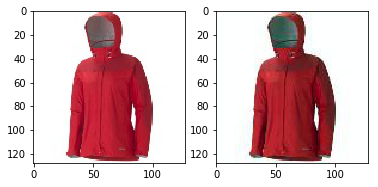

In [72]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_real)
axarr[1].imshow(img_real2)

(array([ 3209.,  7424.,  1694.,  1593.,  1590.,  1526.,  1568.,   932.,
          295., 29321.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

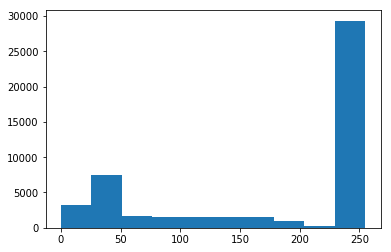

In [73]:
my_arr = np.array(img_real2)
final = []
for arr in my_arr:
    for piece in arr:
        for item in piece:
            final.append(item)
plt.hist(final)

## Challenge 3

In [78]:
final_imgs_features = []
final_imgs_labels = []
dir_order = []

directories = os.listdir(normalized_images_dir)

for subdir in directories:
    filepaths = os.listdir(normalized_images_dir+subdir)
    for img in filepaths:
    #arr = [np.array(Image.open('normalized_imgs/{0}/'.format(subdir)+img)) for img in filepaths]
        img = np.array(Image.open(normalized_images_dir + subdir + '/' + img)).flatten()
        final_imgs_features.append(img)
        final_imgs_labels.append(subdir)
    dir_order.append(subdir)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_imgs_features, final_imgs_labels, test_size=0.25, random_state=42)

In [ ]:
#from sklearn import svm
#clf = svm.SVC()
# Returns our classifier, which is what we used to predict
#clf.fit(x_train, y_train)
#print("...Done!")

In [ ]:
#from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
#logisticRegr = LogisticRegression()
#logisticRegr.fit(x_train, y_train)
#print("...Trained!")
#logisticRegr.predict(x_test)

In [80]:
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def skl_knn(k, test_data, test_target, stored_data, stored_target):
    """k: number of neighbors to use in classication
    test_data: the data/targets used to test the classifier
    stored_data: the data/targets used to classify the test_data
    """
    print('Training...')
    
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(stored_data, stored_target)

    y_pred = classifier.predict(test_data) 

    print(classification_report(test_target, y_pred))
    return classifier

In [81]:
knn_model = skl_knn(8, x_test, y_test, x_train, y_train)

Training...
                   precision    recall  f1-score   support

             axes       0.86      0.90      0.88        21
            boots       1.00      0.97      0.98        30
       carabiners       0.95      0.94      0.94        78
         crampons       1.00      0.67      0.80        27
           gloves       0.97      0.74      0.84        53
hardshell_jackets       0.61      0.94      0.74       121
        harnesses       1.00      0.79      0.88        42
          helmets       0.90      0.56      0.69        16
insulated_jackets       0.69      0.44      0.54        57
          pulleys       1.00      0.08      0.15        12
             rope       0.84      0.70      0.76        46
            tents       0.72      1.00      0.84        28

      avg / total       0.83      0.79      0.78       531



In [82]:
import pickle
pickle.dump(knn_model, open( "knn_model.pkl", "wb" ) )

In [83]:
to_pickle = [x_test, y_test, x_train, y_train]
names = ["x_test", "y_test", "x_train", "y_train"]
for i in range(0, len(names)):
    pickle.dump(to_pickle[i], open( "{0}.pkl".format(names[i]), "wb" ) )
    
pickle.dump(final_imgs_features, open( "features.pkl", "wb" ) )
pickle.dump(final_imgs_labels, open( "labels.pkl", "wb" ) )

In [84]:
!curl -O https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  167k  100  167k    0     0   134k      0  0:00:01  0:00:01 --:--:--  134k


## Challenge 4

In [1]:
import pickle
import numpy as np
def get_pkl(filename):
    with open(filename, 'rb') as f:
        return np.array(pickle.load(f))

### Load Pickle files
- `features` = All features
- `labels` = All labels
- `x_train` = Training features
- `y_train` = Training labels
- `x_test` = Test features
- `y_test` = Test labels

In [2]:
features = get_pkl('images_features.pkl')
labels = get_pkl('images_labels.pkl')

print('Feature shape:', features.shape)
print('Label shape:', labels.shape)

Feature shape: (2122, 128, 128, 3)
Label shape: (2122,)


In [3]:
features_update = np.array(features) / 255
features = features_update

### Get Validation Set
- From `x_train` and `y_train`, get 25% of the data as a validation set
- Will **still** be training on `x_train` and `y_train`

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)
new_x_train, x_validate, new_y_train, y_validate = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [5]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def OneHotCoder(val_arr):
    data = val_arr
    values = array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [6]:
y_train_encoded = OneHotCoder(y_train)
y_test_encoded = OneHotCoder(y_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128,128,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(set(y_train)), activation='softmax'))
     
    return model

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
__________

In [9]:
batch_size = 64
epochs = 10
model1.compile(loss=keras.losses.binary_crossentropy,
              optimizer="adam",metrics=['accuracy'])
history = model1.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1591/1591 [==============================] - 13s 8ms/step - loss: 0.2237 - acc: 0.9257
Epoch 2/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.1198 - acc: 0.9561
Epoch 3/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0814 - acc: 0.9701
Epoch 4/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0605 - acc: 0.9773
Epoch 5/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0477 - acc: 0.9819
Epoch 6/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0365 - acc: 0.9864
Epoch 7/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0373 - acc: 0.9859
Epoch 8/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0289 - acc: 0.9871
Epoch 9/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0242 - acc: 0.9903
Epoch 10/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0210 - acc: 0.9916


In [10]:
results = model1.evaluate(x_test, y_test_encoded, batch_size=batch_size)
results # [Loss, Accuracy]

531/531 [==============================] - 1s 1ms/step


[0.047120220846936754, 0.9854048817171215]

In [11]:
from keras.models import save_model
save_model(model1, "vision-model.h5")